In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [4]:
# Load the Online Shoppers Intention dataset 
online_shoppers_data = pd.read_csv('online_shoppers_intention.csv')

In [5]:
# Data preprocessing
X = online_shoppers_data.drop('Revenue', axis=1)  # Features (excluding the 'Revenue' column)
y = online_shoppers_data['Revenue']  # Target variable

In [6]:
# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['Month', 'VisitorType', 'Weekend'])

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [10]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [11]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7879156528791565
Precision: 0.4127725856697819
Recall: 0.6447688564476886
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.82      0.87      2055
        True       0.41      0.64      0.50       411

    accuracy                           0.79      2466
   macro avg       0.67      0.73      0.68      2466
weighted avg       0.84      0.79      0.80      2466



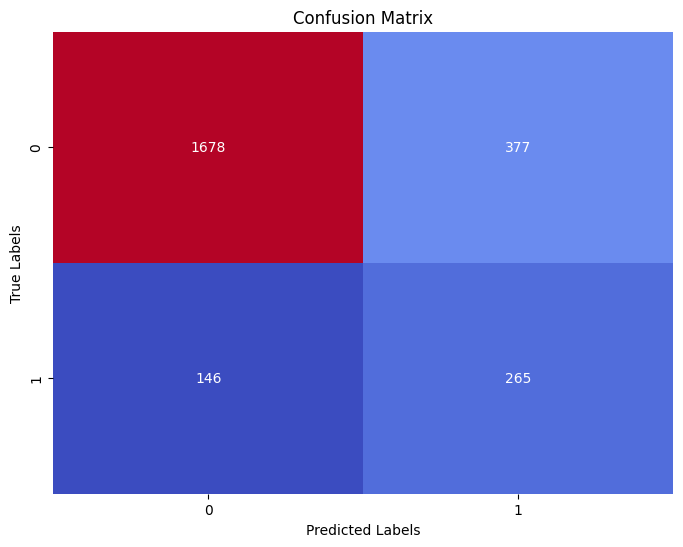

In [12]:
# Plot the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()